# PyTorch Computer Vision

## Computer Vision Libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - fucntion for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## Getting a Dataset

The dataset we'll be using is FashionMNIST from `torchvision.dataset`

In [2]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = True,  # want the training dataset?
    download = True, # want to download?
    transform = ToTensor(),
    target_transform = None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

train_data, test_data

100%|██████████| 26.4M/26.4M [00:25<00:00, 1.05MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 3.91MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:04<00:00, 1.05MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.30MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

# above label prinnting 9 indicates that the train_data is of class Ankle boot

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# check the shape of our image
print(f"Image shape: {image.shape} -> [color_channel, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Image label: Ankle boot


### Visualize Our Data

Shape of the image: torch.Size([1, 28, 28])


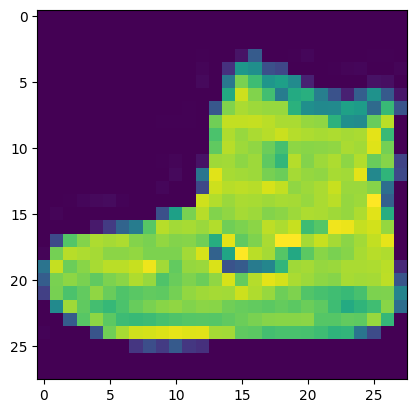

In [7]:
image, label = train_data[0]
print(f"Shape of the image: {image.shape}")
plt.imshow(image.squeeze())  # have to use .squeeze() has plt expects the image of shape: height & width

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

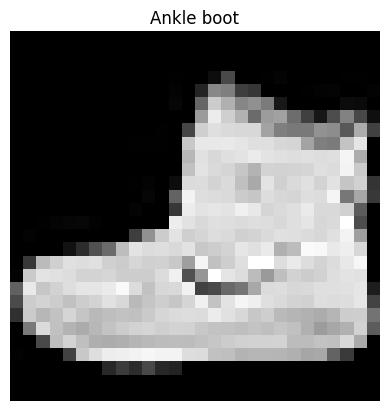

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

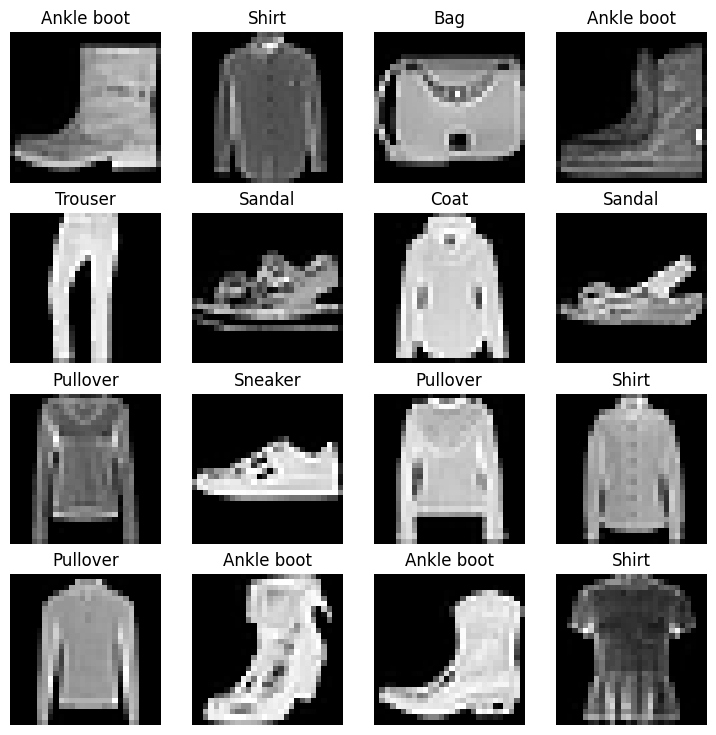

In [9]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_index)
    img, label = train_data[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.
Datasets turns our data into Python iterable.
More speifically, we want to turn our data into batches (or mini-batches)

Why do we do this?

1. It is more computationally effiecient, your computing hardware may not be able to store 60000 images in one hit. So, we break it down to 32 images at a time (batch size = 32)
2. It gives our neural network more chances to update its gradient per epoch.

In [10]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# turn the datasets into iterable (batches)
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)  # for evaluation purpose, it's good to have the data in the same order

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79340df357f0>,
 <torch.utils.data.dataloader.DataLoader at 0x79340e1a6ea0>)

In [11]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [12]:
# check out what's the inside of training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

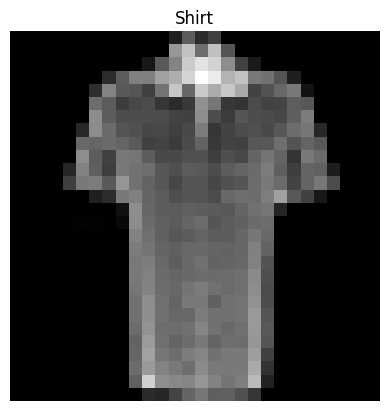

In [13]:
torch.manual_seed(42)
random_index = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## Build a Baseline Model

When starting to build a series of machine learning modelling experiments, it's best to practise to start with a baseline model.

In other words: start simply and add complexity when necessary.

In [14]:
# create a flatten layer
flatten_layer = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_layer(x) # forward pass
print(f"Shape after flattening: {output.shape}")  # 28^2 = 784

Shape after flattening: torch.Size([1, 784])


In [15]:
# build the model
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int,
                  hidden_units: int,
                  output_shape: int):

        super().__init__();

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names))

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
rand_x = torch.rand([1, 1, 28, 28])
model_0(rand_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setup Loss Function, Optimizer & Evaluation Metrics

* Loss function - Since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()`
* Evaluation metric - we'll use accuracy as our evaluation metric

In [18]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # find how many times two tensors are equal
    accuracy = correct / len(y_pred) * 100
    return accuracy

In [19]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

### Creating a Function To Time Our Experiment

Two of the main things that you want to track in ML is:

1. Model's Performance (accuracy & loss)
2. How fast it runs

In [20]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device):
    total_time = end - start

    print(f"Time taken on device {device}: {total_time:.3f} seconds")

### Creating a Training & Testing Loop For a Model On Batches Of Data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate test loss **per batch**.
4. Print out what's happening.
5. Time it all.

Note: Optimzer will update model's parameters after every batch rather than every epoch.

In [21]:
# progressbar thing
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")

    train_loss = 0

    # add a loop to loop through the training dataloader
    for batch, (x, y) in enumerate(train_dataloader):
        model_0.train()

        # forward pass
        y_pred = model_0(x)

        # calculate theh loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss = train_loss + loss  # accumulate the train loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print out what's happening
        if batch % 400 == 0:
            print(f"Looked at: {batch * len(x)}/{len(train_dataloader.dataset)} samples.")

    train_loss = train_loss / len(train_dataloader)

    # testing

    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for x_test, y_test in test_dataloader:
            # forward pass
            test_pred = model_0(x_test)

            # calculate the loss (accumulatively)
            test_loss = test_loss + loss_fn(test_pred, y_test)

            # calculate the accuracy
            test_acc = test_acc + accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

        # calculate the test loss per batch (average)
        test_loss = test_loss / len(test_dataloader)

        # calculate the accuracy per batch (average)
        test_acc = test_acc / len(test_dataloader)

    # print out what's happening
    print(f"Train loss: {train_loss:.3f} | Test loss: {test_loss:.3f} | Test accuracy: {test_acc:.3f}")

# calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device))

/home/programmer/PyTorch Project/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.


 33%|███▎      | 1/3 [00:08<00:16,  8.03s/it]

Train loss: 0.590 | Test loss: 0.510 | Test accuracy: 82.039
Epoch: 1
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.


 67%|██████▋   | 2/3 [00:17<00:08,  8.77s/it]

Train loss: 0.476 | Test loss: 0.480 | Test accuracy: 83.197
Epoch: 2
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.


100%|██████████| 3/3 [00:25<00:00,  8.50s/it]

Train loss: 0.455 | Test loss: 0.477 | Test accuracy: 83.427
Time taken on device cpu: 25.506 seconds


## Make Predictions & Get Model 0 Results

In [22]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader"""

    loss, acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for x_test, y_test in tqdm(data_loader):
            # forward pass
            y_pred = model(x_test)

            # calculate the loss
            loss += loss_fn(y_pred, y_test)

            # calculate the accuracy
            acc += accuracy_fn(y_true = y_test, y_pred = y_pred.argmax(dim=1))

        # average loss and acc
        loss = loss / len(data_loader)
        acc = acc / len(data_loader)

    return {"model_name": model.__class__.__name__,  # only works when model was created with class
            "model_loss": loss.item(),
            "model_accuracy": acc
            }

In [23]:
# calculate the model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:01<00:00, 296.72it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

## Setup Device Agnostic-Code

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Building a Better Model With Non-Linearity

In [25]:
# create a model with linear & non-linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_unit: int,
                 output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features =  input_shape, out_features = hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features = hidden_unit, out_features = output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [26]:
# create an instance
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_unit = 10,
                              output_shape = len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### Setup Loss Function & Optimizer



In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

### Functionizing Training & Testing Loops

In [28]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    """Performs a training set with model trying to learn on data_loader"""

    train_loss, train_acc = 0, 0

    model.train()

    for batch, (x, y) in enumerate(data_loader):
        # put data on target device
        x, y = x.to(device), y.to(device)

        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        train_loss = train_loss + loss

        train_acc = train_acc + accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = train_loss / len(data_loader)
    train_acc = train_acc / len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")

In [29]:
def test_step(model: torch.nn.Module,
              loss_fn: torch.nn,
              accuracy_fn,
              data_loader: torch.utils.data.DataLoader,
              device: torch.device = device):

    """Performs a testing loop step on a model going over data_loader"""

    test_loss, test_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for batch, (x, y) in enumerate(data_loader):
            x, y = x.to(device), y.to(device)

            y_pred = model(x)
            test_loss = test_loss + loss_fn(y_pred, y)
            test_acc = test_acc + accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

        test_loss = test_loss / len(data_loader)
        test_acc = test_acc / len(data_loader)

    print(f"Test loss: {test_loss:.3f} | Test accuracy: {test_acc:2f}")

In [30]:
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")

    train_step(model = model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn)

    test_step(model = model_1,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 1.09199 | Train acc: 61.34


 33%|███▎      | 1/3 [00:09<00:19,  9.61s/it]

Test loss: 0.956 | Test accuracy: 64.996006
Epoch: 1
Train loss: 0.78101 | Train acc: 71.93


 67%|██████▋   | 2/3 [00:19<00:10, 10.07s/it]

Test loss: 0.722 | Test accuracy: 73.911741
Epoch: 2
Train loss: 0.67027 | Train acc: 75.94


100%|██████████| 3/3 [00:29<00:00,  9.90s/it]

Test loss: 0.685 | Test accuracy: 75.019968


## Building a Convolutional Neural Network (CNN)

CNN's are used for ConvNets.
CNN's are known for their capabilities to find patterns in visual data.

In [31]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape, out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),

            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),

            nn.ReLU(),

            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features = hidden_units * 7 * 7,  # have to calculate this as we are flattening before feeding it in liner layer
                      out_features = output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x


In [32]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,  # grayscale images
                              hidden_units = 128,
                              output_shape = len(class_names)).to(device)

In [33]:
random_tensor = torch.randn(size = (1, 28, 28)).unsqueeze(dim=1)
model_2(random_tensor.to(device))

tensor([[-0.0396,  0.0116, -0.0625, -0.0051,  0.0090,  0.0273, -0.0160,  0.0655,
         -0.0169,  0.0481]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Setup Loss Fn & Optimizer For `model_2`

In [34]:
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)
# optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01, momentum=0.9)


### Training & Testing `model_2`

In [35]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_model_2 = timer()

# train and test the model

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model = model_2, data_loader = train_dataloader,
               loss_fn = loss_fn,#
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

    test_step(model = model_2,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)


train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2, device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.49944 | Train acc: 81.91


 33%|███▎      | 1/3 [00:24<00:48, 24.16s/it]

Test loss: 0.338 | Test accuracy: 87.799521
Epoch: 1
-------
Train loss: 0.30722 | Train acc: 89.04


 67%|██████▋   | 2/3 [00:48<00:24, 24.14s/it]

Test loss: 0.278 | Test accuracy: 89.856230
Epoch: 2
-------
Train loss: 0.26400 | Train acc: 90.66


100%|██████████| 3/3 [01:12<00:00, 24.17s/it]

Test loss: 0.245 | Test accuracy: 91.303914
Time taken on device cuda: 72.516 seconds


### Make & Evaluate Random Prediction With Best Model


In [36]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device : torch.device = device):

    pred_probs = []
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(dim=1).to(device)

            pred_logits = model(sample)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # get pred_prob off GPU as matplotlib doesn't work with GPU
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

## Making a Confusion Matrix For Further evaluation

In [37]:
# make predictions with trained model

y_preds = []

model_2.eval()
with torch.inference_mode():
    for x, y in tqdm(test_dataloader):
        x, y = x.to(device), y.to(device)
        y_logits = model_2(x)

        # logits -> probability -> label
        y_pred = torch.softmax(y_logits.squeeze(), dim=1).argmax(dim=1)

        y_preds.append(y_pred)

print(y_preds[:1]) # list of 313 batches each containing 32 prediction labels
y_preds_tensor = torch.cat(y_preds) # concatenating all those batches
print(y_preds_tensor[:10])

100%|██████████| 313/313 [00:01<00:00, 231.41it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8], device='cuda:0')]
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], device='cuda:0')


In [38]:
# install torchmetrics
!pip install -q torchmetrics
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 862.4 kB/s eta 0:00:0000:0100:01


In [39]:
import mlxtend

In [40]:
mlxtend.__version__

'0.23.4'

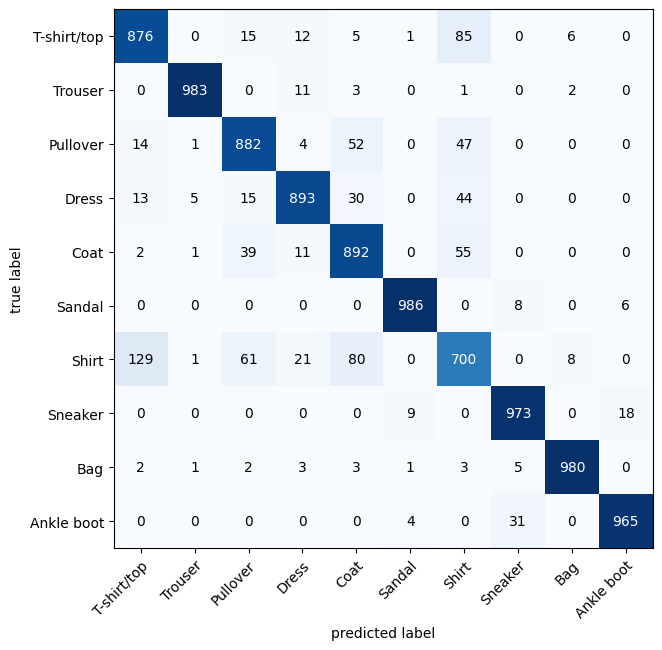

In [41]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion matrix instance
confmat = ConfusionMatrix(num_classes = len(class_names), task = "multiclass").to(device)
confmat_tensor = confmat(preds = y_preds_tensor, target = test_data.targets.to(device))

# plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.cpu().numpy(),
    class_names = class_names,
    figsize = (10, 7)
)

## Save & Load Best Performing Model

In [42]:
from pathlib import Path

# create model path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# create model save
MODEL_NAME = "pytorch_computer_vision_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state_dict
torch.save(obj = model_2.state_dict(), f = MODEL_SAVE_PATH)